In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import math
import numpy as np

%matplotlib inline

In [10]:
class DICE:
    '''
    DICE class turns numbers into their respective DICE embeddings
    
    Since the cosine function decreases monotonically between 0 and pi, simply employ a linear mapping
    to map distances s_n \in [0, |a-b|] to angles \theta \in [0, pi]
    '''
    def __init__(self, d=2, min_bound=0, max_bound=100, norm="l2"):
        self.d = d # By default, we build DICE-2
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.norm = norm  # Restrict x and y to be of unit length
        self.M = np.random.normal(0, 1, (self.d, self.d))
        self.Q, self.R = np.linalg.qr(self.M, mode="complete")  # QR decomposition for orthonormal basis, Q
    
    def __linear_mapping(self, num):
        '''Eq. (4) from DICE'''
        norm_diff = num / abs(self.min_bound - self.max_bound)
        theta = norm_diff * math.pi
        return theta
    
    def make_dice(self, num):
        r = 1
        theta = self.__linear_mapping(num)
        if self.d == 2:
            # DICE-2
            polar_coord = np.array([r*math.cos(theta), r*math.sin(theta)])
        elif self.d > 2:
            # DICE-D
            polar_coord = np.array([math.sin(theta)**(dim-1) * math.cos(theta) if dim < self.d else math.sin(theta)**(self.d) for dim in range(1, self.d+1)])
        else:
            raise ValueError("Wrong value for `d`. `d` should be greater than or equal to 2.")
            
        dice = np.dot(self.Q, polar_coord)  # DICE-D embedding for `num`
        
        # return dice.tolist()
        return dice

In [11]:
dice = DICE(d=10, min_bound=0, max_bound=100)
dice.make_dice(10)

array([-0.0247422 ,  0.61807266,  0.26788294,  0.52169065,  0.3021482 ,
        0.17652806, -0.12608263,  0.06267609, -0.07315824, -0.35470927])

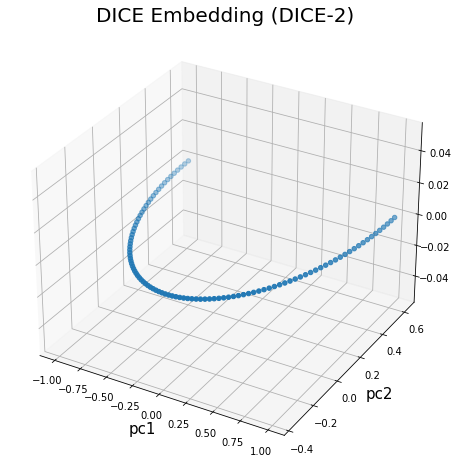

In [12]:
dice = DICE(d=2, min_bound=0, max_bound=100)

sample_nums = list(range(0, 100))

# Generate DICE-embeddings and plot them
dice_mat = []
for num in sample_nums:
    dice_mat.append(dice.make_dice(num))

dice_mat = np.array(dice_mat)

pca = PCA(n_components=2)
p_comp = pca.fit_transform(dice_mat)
p_df = pd.DataFrame(data = p_comp, columns = ["pc1", "pc2"])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("pc1", fontsize=15)
ax.set_ylabel("pc2", fontsize=15)
ax.set_title("DICE Embedding (DICE-2)",fontsize=20)

ax.scatter(p_df["pc1"], p_df["pc2"])

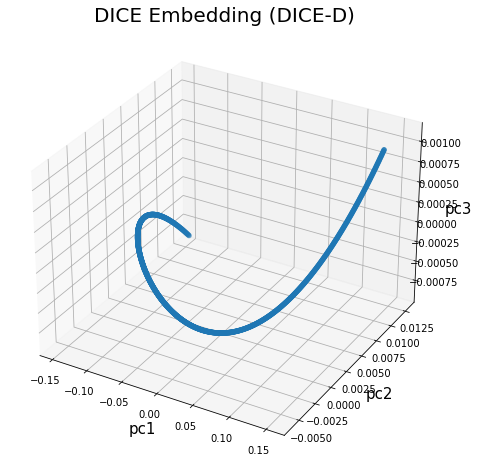

In [18]:
dice = DICE(d=3, min_bound=0, max_bound=9999)

sample_nums = list(range(0, 1000))

# Generate DICE-embeddings and plot them
dice_mat = []
for num in sample_nums:
    dice_mat.append(dice.make_dice(num))

# print(np.array(dice_mat)[:10])
dice_mat = np.array(dice_mat)

pca = PCA(n_components=3)
p_comp = pca.fit_transform(dice_mat)
p_df = pd.DataFrame(data = p_comp, columns = ["pc1", "pc2", "pc3"])

fig = plt.figure(figsize=(8,8))
ax_3d = fig.add_subplot(111, projection="3d")
ax_3d.set_xlabel("pc1", fontsize=15)
ax_3d.set_ylabel("pc2", fontsize=15)
ax_3d.set_zlabel("pc3", fontsize=15)
ax_3d.set_title("DICE Embedding (DICE-D)",fontsize=20)

ax_3d.scatter(p_df["pc1"], p_df["pc2"], p_df["pc3"])

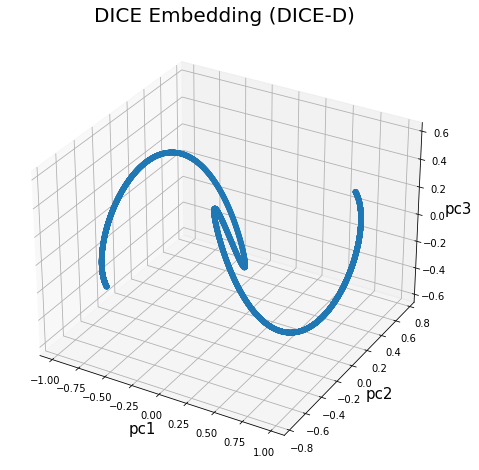

In [19]:
dice = DICE(d=256, min_bound=0, max_bound=9999)

sample_nums = list(range(0, 10000))

# Generate DICE-embeddings and plot them
dice_mat = []
for num in sample_nums:
    dice_mat.append(dice.make_dice(num))

# print(np.array(dice_mat)[:10])
dice_mat = np.array(dice_mat)

pca = PCA(n_components=3)
p_comp = pca.fit_transform(dice_mat)
p_df = pd.DataFrame(data = p_comp, columns = ["pc1", "pc2", "pc3"])

fig = plt.figure(figsize=(8,8))
ax_3d = fig.add_subplot(111, projection="3d")
ax_3d.set_xlabel("pc1", fontsize=15)
ax_3d.set_ylabel("pc2", fontsize=15)
ax_3d.set_zlabel("pc3", fontsize=15)
ax_3d.set_title("DICE Embedding (DICE-D)",fontsize=20)

ax_3d.scatter(p_df["pc1"], p_df["pc2"], p_df["pc3"])